In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import random
import shap

In [54]:
df = pd.read_csv('weight_change_dataset.csv')
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [55]:
df.drop(['Participant ID', 'Final Weight (lbs)'], axis=1, inplace=True)
df

,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level
0,56,M,228.4,3102.3,3916.0,813.7,0.20000,1,Sedentary,Excellent,6
1,46,F,165.4,2275.5,3823.0,1547.5,2.40000,6,Very Active,Excellent,6
2,32,F,142.8,2119.4,2785.4,666.0,1.40000,7,Sedentary,Good,3
3,25,F,145.5,2181.3,2587.3,406.0,0.80000,8,Sedentary,Fair,2
4,38,M,155.5,2463.8,3312.8,849.0,2.00000,10,Lightly Active,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
95,59,M,181.9,2622.8,3656.2,1033.4,0.60000,2,Lightly Active,Excellent,3
96,56,F,116.5,1736.5,2756.5,1020.0,-8.92309,12,Moderately Active,Good,9
97,58,F,162.7,2188.6,3344.3,1155.8,3.60000,12,Lightly Active,Fair,7
98,45,M,179.8,2671.9,4000.0,1328.1,2.00000,5,Moderately Active,Fair,5


In [56]:
gender_dummies = pd.get_dummies(df['Gender'], dtype=int, drop_first=True)
gender_dummies.rename(columns={'M': 'is_male'}, inplace=True)
df = pd.concat([df, gender_dummies], axis=1)
df.drop('Gender', axis=1, inplace=True)
df

,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,is_male
0,56,228.4,3102.3,3916.0,813.7,0.20000,1,Sedentary,Excellent,6,1
1,46,165.4,2275.5,3823.0,1547.5,2.40000,6,Very Active,Excellent,6,0
2,32,142.8,2119.4,2785.4,666.0,1.40000,7,Sedentary,Good,3,0
3,25,145.5,2181.3,2587.3,406.0,0.80000,8,Sedentary,Fair,2,0
4,38,155.5,2463.8,3312.8,849.0,2.00000,10,Lightly Active,Good,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,59,181.9,2622.8,3656.2,1033.4,0.60000,2,Lightly Active,Excellent,3,1
96,56,116.5,1736.5,2756.5,1020.0,-8.92309,12,Moderately Active,Good,9,0
97,58,162.7,2188.6,3344.3,1155.8,3.60000,12,Lightly Active,Fair,7,0
98,45,179.8,2671.9,4000.0,1328.1,2.00000,5,Moderately Active,Fair,5,1


In [57]:
df['Physical Activity Level'] = df['Physical Activity Level'].map(
    {'Sedentary': 0, 'Very Active': 3, 'Lightly Active': 1, 'Moderately Active': 2})
df

,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,is_male
0,56,228.4,3102.3,3916.0,813.7,0.20000,1,0,Excellent,6,1
1,46,165.4,2275.5,3823.0,1547.5,2.40000,6,3,Excellent,6,0
2,32,142.8,2119.4,2785.4,666.0,1.40000,7,0,Good,3,0
3,25,145.5,2181.3,2587.3,406.0,0.80000,8,0,Fair,2,0
4,38,155.5,2463.8,3312.8,849.0,2.00000,10,1,Good,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,59,181.9,2622.8,3656.2,1033.4,0.60000,2,1,Excellent,3,1
96,56,116.5,1736.5,2756.5,1020.0,-8.92309,12,2,Good,9,0
97,58,162.7,2188.6,3344.3,1155.8,3.60000,12,1,Fair,7,0
98,45,179.8,2671.9,4000.0,1328.1,2.00000,5,2,Fair,5,1


In [58]:
df['Sleep Quality'] = df['Sleep Quality'].map(
    {'Poor': 0, 'Excellent': 3, 'Fair': 1, 'Good': 2})
df

,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,is_male
0,56,228.4,3102.3,3916.0,813.7,0.20000,1,0,3,6,1
1,46,165.4,2275.5,3823.0,1547.5,2.40000,6,3,3,6,0
2,32,142.8,2119.4,2785.4,666.0,1.40000,7,0,2,3,0
3,25,145.5,2181.3,2587.3,406.0,0.80000,8,0,1,2,0
4,38,155.5,2463.8,3312.8,849.0,2.00000,10,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,59,181.9,2622.8,3656.2,1033.4,0.60000,2,1,3,3,1
96,56,116.5,1736.5,2756.5,1020.0,-8.92309,12,2,2,9,0
97,58,162.7,2188.6,3344.3,1155.8,3.60000,12,1,1,7,0
98,45,179.8,2671.9,4000.0,1328.1,2.00000,5,2,1,5,1


In [59]:
# defining X and y
X = df.drop(["Weight Change (lbs)"], axis=1)
y = df[["Weight Change (lbs)"]]

In [60]:
# splitting Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=23)

In [61]:
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

print(vif)

                        Variable           VIF
0                            Age  1.108557e+01
1           Current Weight (lbs)  4.229050e+02
2                 BMR (Calories)  5.877969e+09
3        Daily Calories Consumed  1.156508e+10
4  Daily Caloric Surplus/Deficit  1.058156e+09
5               Duration (weeks)  4.781053e+00
6        Physical Activity Level  9.326182e+00
7                  Sleep Quality  2.522730e+00
8                   Stress Level  5.199596e+00
9                        is_male  4.855282e+00


In [62]:
X_train.drop('BMR (Calories)', axis=1, inplace=True)
X_test.drop('BMR (Calories)', axis=1, inplace=True)
X_train

,Age,Current Weight (lbs),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,is_male
97,58,162.7,3344.3,1155.8,12,1,1,7,0
23,29,207.0,4000.0,976.7,6,2,2,4,1
7,40,207.9,4000.0,1022.1,11,2,0,9,1
60,43,173.3,4000.0,1383.6,11,2,2,5,1
27,59,151.4,3877.8,1559.8,6,3,3,8,1
...,...,...,...,...,...,...,...,...,...
31,20,158.3,4000.0,1418.1,10,3,0,5,1
54,19,171.9,3434.8,712.2,6,1,0,3,1
73,35,158.5,3199.8,938.3,6,2,0,6,0
40,31,153.9,3195.6,959.9,8,1,2,6,0


In [63]:
# Let's recalculate VIF
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

print(vif)

                        Variable          VIF
0                            Age    10.929718
1           Current Weight (lbs)   418.160591
2        Daily Calories Consumed  1022.958998
3  Daily Caloric Surplus/Deficit   156.340415
4               Duration (weeks)     4.766097
5        Physical Activity Level     9.266980
6                  Sleep Quality     2.516811
7                   Stress Level     5.109894
8                        is_male     4.783526


In [64]:
X_train.drop('Daily Caloric Surplus/Deficit', axis=1, inplace=True)
X_test.drop('Daily Caloric Surplus/Deficit', axis=1, inplace=True)
X_train

,Age,Current Weight (lbs),Daily Calories Consumed,Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,is_male
97,58,162.7,3344.3,12,1,1,7,0
23,29,207.0,4000.0,6,2,2,4,1
7,40,207.9,4000.0,11,2,0,9,1
60,43,173.3,4000.0,11,2,2,5,1
27,59,151.4,3877.8,6,3,3,8,1
...,...,...,...,...,...,...,...,...
31,20,158.3,4000.0,10,3,0,5,1
54,19,171.9,3434.8,6,1,0,3,1
73,35,158.5,3199.8,6,2,0,6,0
40,31,153.9,3195.6,8,1,2,6,0


In [ ]:
numeric_transformer = StandardScaler()
scaled_X_train = numeric_transformer.fit_transform(X_train)
scaled_X_test = numeric_transformer.transform(X_test)

numerical_features = X_train.columns

In [66]:
preProcess = ColumnTransformer(
    transformers=[('num', numeric_transformer, numerical_features)])

pipeline = Pipeline([('preprocess', preProcess),
                     ('regressor', RandomForestRegressor())])

param_grid = [{'regressor': [RandomForestRegressor()],
               'regressor__max_depth': [1, 2, 3, 4],
              'regressor__n_estimators': [100, 500]}]

In [67]:
print(X_train.columns)

Index(['Age', 'Current Weight (lbs)', 'Daily Calories Consumed',
       'Duration (weeks)', 'Physical Activity Level', 'Sleep Quality',
       'Stress Level', 'is_male'],
      dtype='object')


In [68]:
random.seed(1)
cv_mine = KFold(n_splits=3)
gridSearch = GridSearchCV(pipeline, param_grid, cv=cv_mine,
                          scoring='r2', n_jobs=-1)
gridSearch.fit(X_train, y_train)

c:\Users\mmech\anaconda3\envs\Fall24Mining\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         Index(['Age', 'Current Weight (lbs)', 'Daily Calories Consumed',
       'Duration (weeks)', 'Physical Activity Level', 'Sleep Quality',
       'Stress Level', 'is_male'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [1, 2, 3, 4],
                          'regressor__n_estimators': [100, 500]}],
             scoring='r2')

In [69]:
gridSearch.best_params_

{'regressor': RandomForestRegressor(),
 'regressor__max_depth': 2,
 'regressor__n_estimators': 100}

In [70]:
gridSearch.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Age', 'Current Weight (lbs)', 'Daily Calories Consumed',
       'Duration (weeks)', 'Physical Activity Level', 'Sleep Quality',
       'Stress Level', 'is_male'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(max_depth=2))])

In [71]:
best_model = gridSearch.best_estimator_

y_pred = best_model.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.70663296974348
21.635946635936946


In [72]:
feature_importances = best_model.named_steps['regressor'].feature_importances_

print("Best parameters:", gridSearch.best_params_)
print("Feature importances:", feature_importances)

Best parameters: {'regressor': RandomForestRegressor(), 'regressor__max_depth': 2, 'regressor__n_estimators': 100}
Feature importances: [0.00124756 0.01744339 0.02175908 0.08025209 0.00062485 0.40019775
 0.47566927 0.00280601]


In [73]:
rf = best_model.named_steps['regressor']
preprocessor = best_model.named_steps["preprocess"]
rf

RandomForestRegressor(max_depth=2)

In [74]:
# adjust "preprocessor" as needed
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = preprocessor.get_feature_names()

feature_names

array(['num__Age', 'num__Current Weight (lbs)',
       'num__Daily Calories Consumed', 'num__Duration (weeks)',
       'num__Physical Activity Level', 'num__Sleep Quality',
       'num__Stress Level', 'num__is_male'], dtype=object)

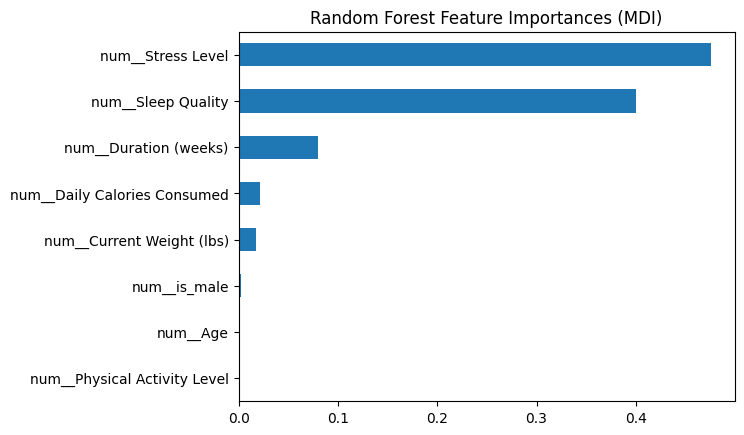

In [75]:
mdi_importances = pd.Series(rf.feature_importances_,
                            index=feature_names).sort_values(ascending=True)

# Plot the importances
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
plt.show()

According to this graph the two most influential variables are stress level and sleep quality.

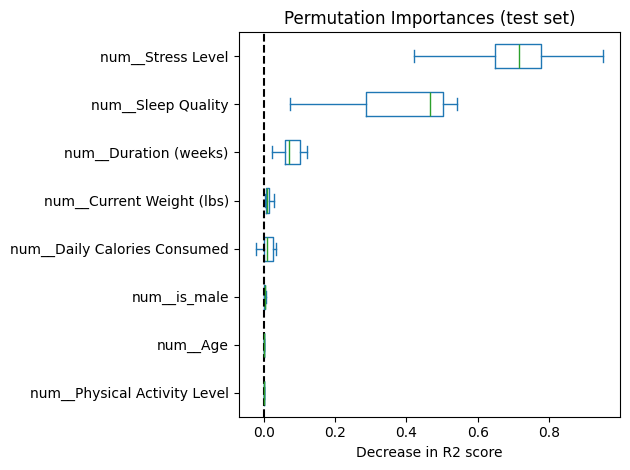

In [76]:
from sklearn.inspection import permutation_importance

# Transform the validation set
X_val_transformed = preprocessor.transform(X_test)

# Create a DataFrame from the transformed validation data
# Get feature names from the preprocessor if it has a feature names attribute
try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    # Provide custom names if preprocessor lacks `get_feature_names_out`
    feature_names = [f"feature_{i}" for i in range(X_val_transformed.shape[1])]

X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=feature_names)

# Compute permutation feature importance using the test data
result = permutation_importance(
    rf, X_val_transformed, y_test, n_repeats=10, random_state=42, n_jobs=2
)

# Sort importances and prepare a DataFrame for plotting
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_val_transformed_df.columns[sorted_importances_idx],
)

# Plot the permutation feature importance
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in R2 score")

plt.tight_layout()
plt.show()

According to these plots, we see that both stress level and sleep quality have a wider range of influence on R2 score, with stress ultimately decreasing it more so.

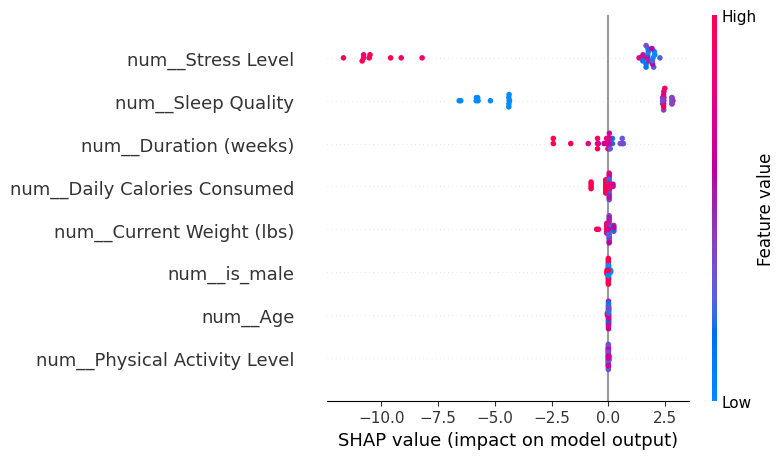

In [77]:
# Plot the SHAP feature importance
X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=feature_names)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_val_transformed_df)
shap.summary_plot(shap_values, X_val_transformed_df)

Above, you can see that the higher the stress level the more negative the impact on one's ability to maintain their current weight. The lower the sleep quality, the more negative an influence on weight maintenance. Though, maybe less notably, you can also see that a greater duration between current and final weight, the more negative SHAP values. You can also see that a high value of calories consumed daily results in a negative SHAP value.

In [78]:
# Ensure columns match after transformation
print(X_val_transformed_df.columns)
print(X_test.iloc[4, :])  # Check values for the 5th sample in the test set

Index(['num__Age', 'num__Current Weight (lbs)', 'num__Daily Calories Consumed',
       'num__Duration (weeks)', 'num__Physical Activity Level',
       'num__Sleep Quality', 'num__Stress Level', 'num__is_male'],
      dtype='object')
Age                          58.0
Current Weight (lbs)        198.8
Daily Calories Consumed    3622.6
Duration (weeks)              9.0
Physical Activity Level       1.0
Sleep Quality                 0.0
Stress Level                  1.0
is_male                       1.0
Name: 77, dtype: float64


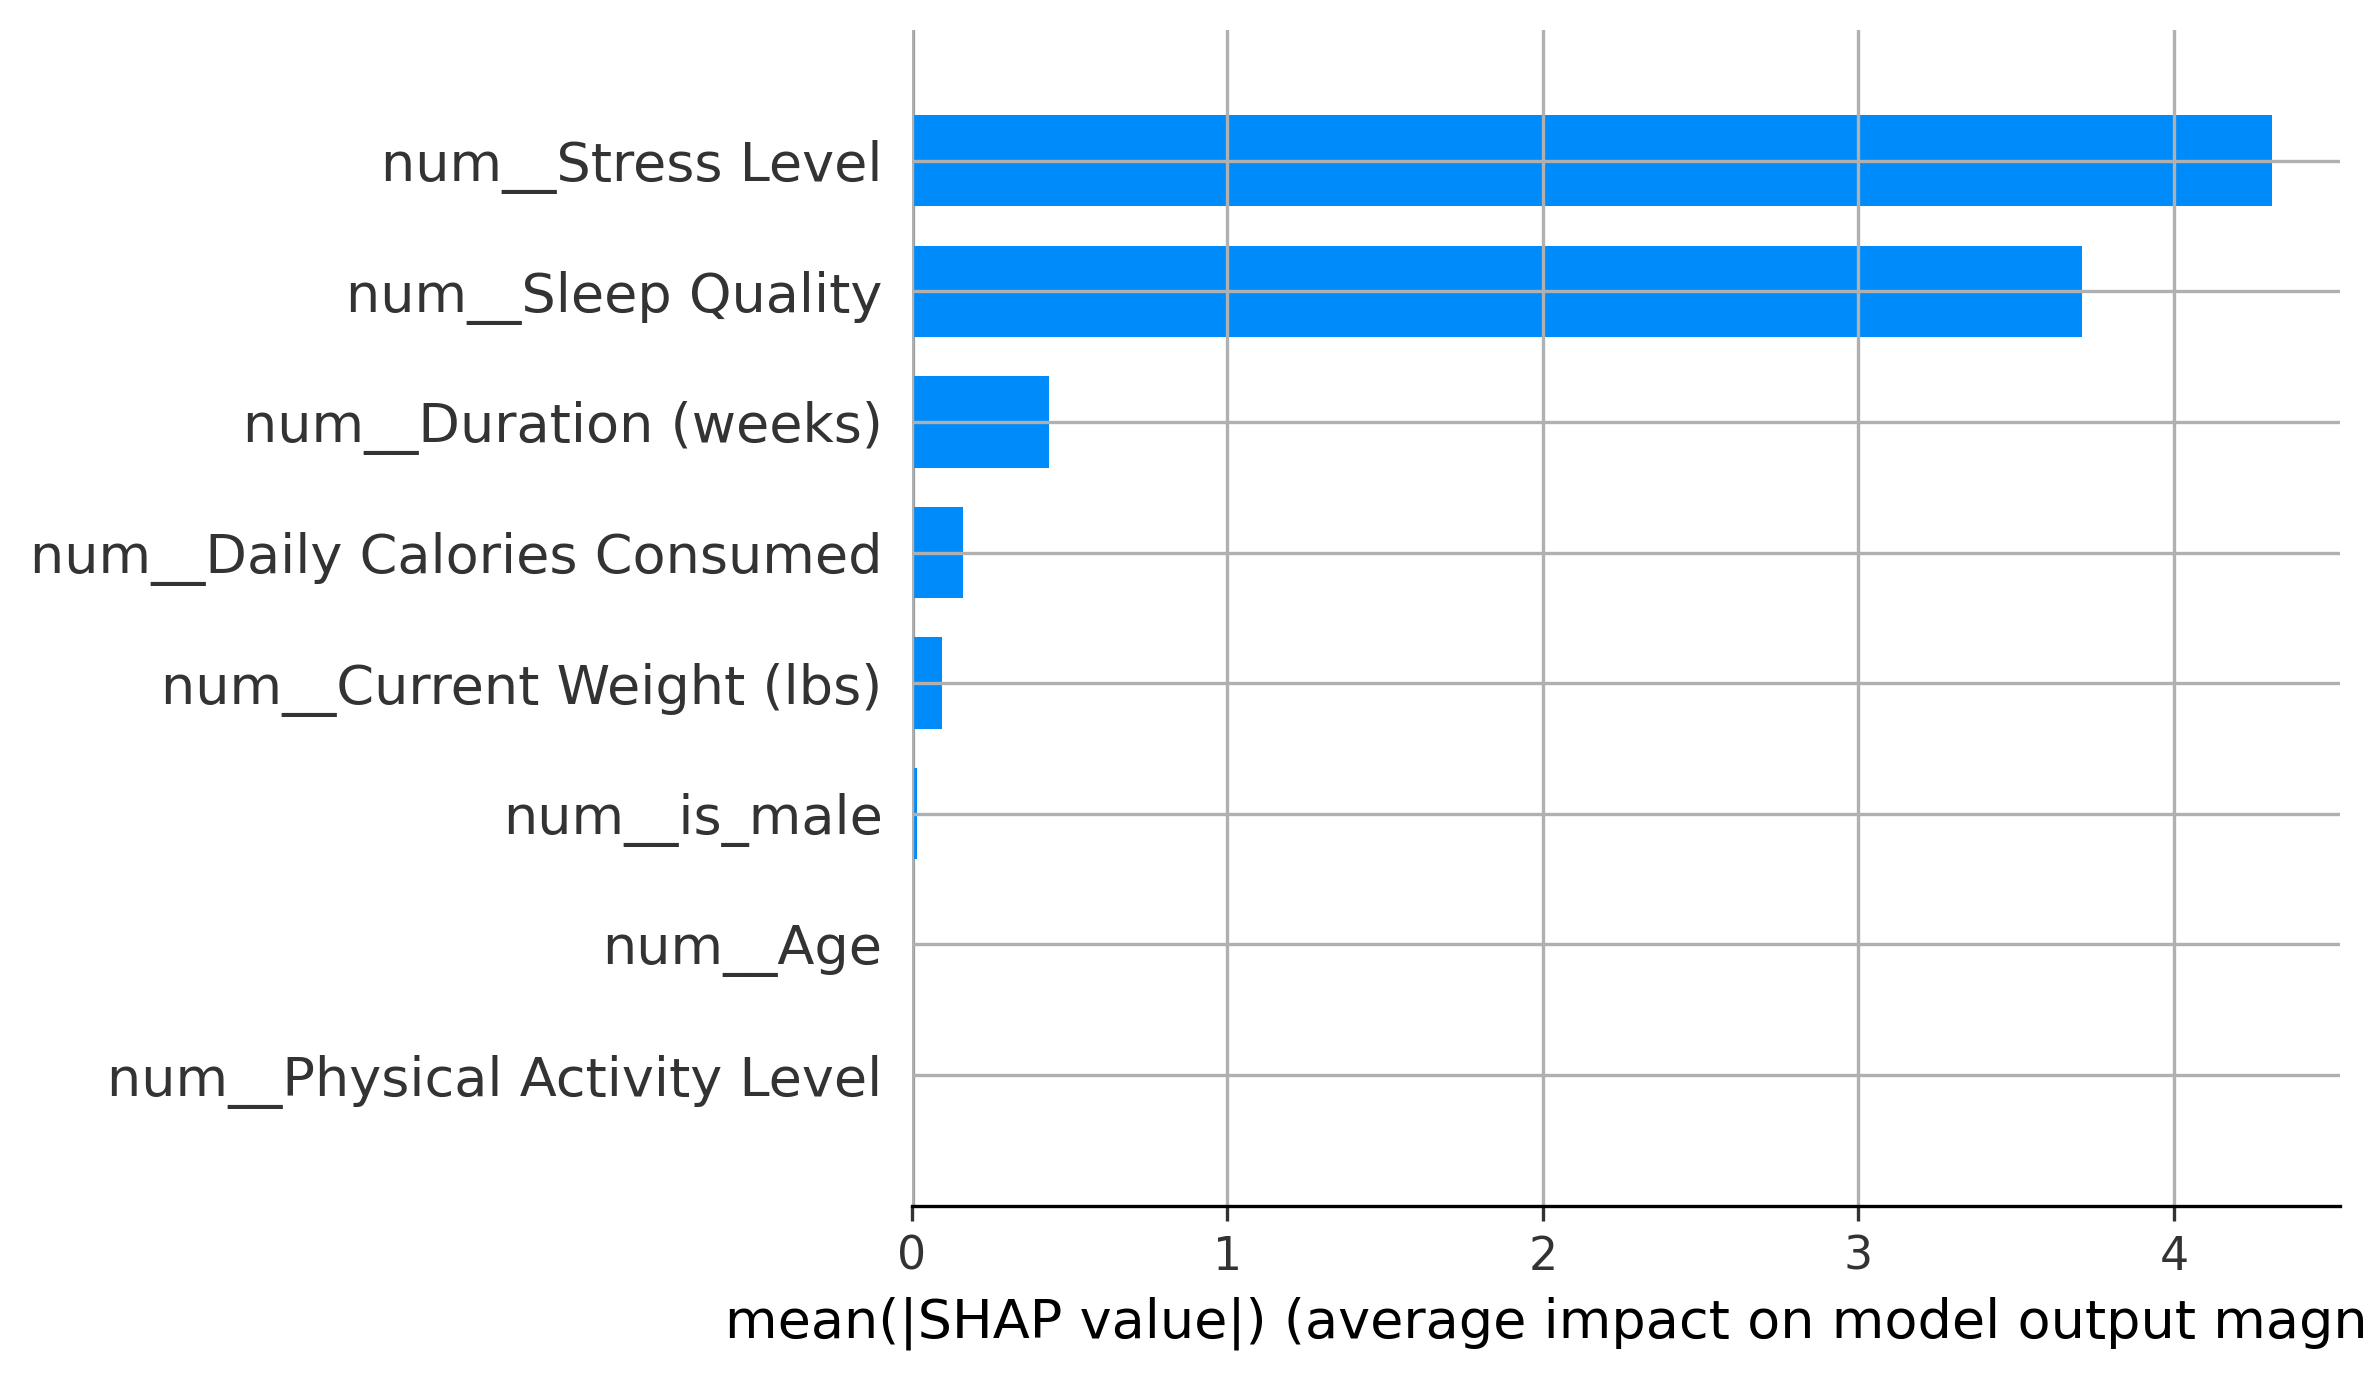

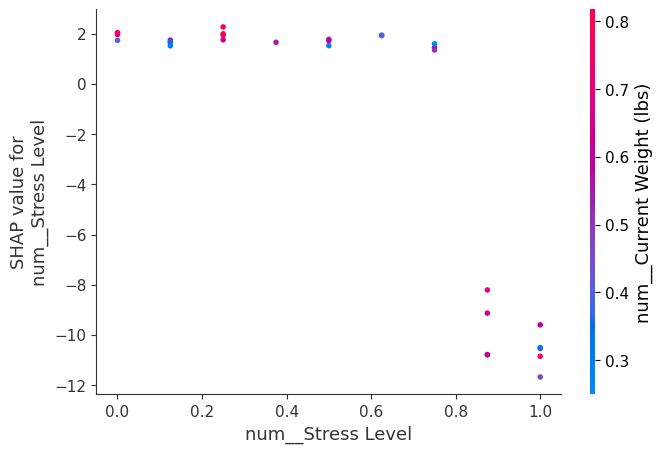

In [79]:
fig = plt.figure(figsize=(6, 3.3), dpi=300)
shap.summary_plot(shap_values, X_val_transformed_df,
                  plot_type="bar", show=False)
plt.grid()
shap.dependence_plot("num__Stress Level", shap_values, X_val_transformed_df)

The features, again, with the most influence on one's weight gain/loss/maintenance are their stress level and sleep quality.

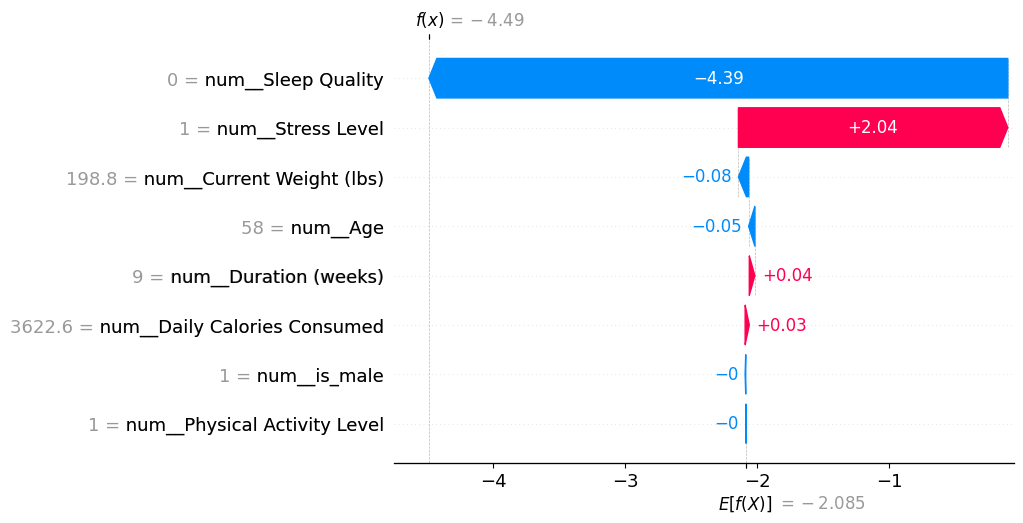

In [80]:
fig = plt.figure(figsize=(6, 3.3))
explanation5 = shap.Explanation(values=shap_values[4], base_values=explainer.expected_value[0],
                                feature_names=X_val_transformed_df.columns, data=X_test.iloc[4, :])
shap.plots.waterfall(explanation5)
fig.tight_layout()